In [1]:
%matplotlib inline
# magic command inline 

import matplotlib.pyplot as plt
import pandas as pd
# import dependencies

In [2]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"
# create reference variables to our csv files

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
# read the csv file "city_data_to_load" into city dataframe
city_data_df.head(10)
# display the first ten rows of the dataframe

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
# read the csv file "ride_data_to_load" into ride dataframe
ride_data_df.head(10)
# display the first ten rows of the dataframe

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
## before merging our dataframes, we want to explore them to make sure the data is clean and there are no missing values
# first, the city dataframe:

city_data_df.count(), city_data_df.isnull().sum()
# count the number of rows in the city dataframe
# shows a count of any cells out of each row that may be empty

(city            120
 driver_count    120
 type            120
 dtype: int64,
 city            0
 driver_count    0
 type            0
 dtype: int64)

In [6]:
city_data_df.dtypes
# gather data types of each column in city dataframe

city            object
driver_count     int64
type            object
dtype: object

In [7]:
city_data_df["type"].unique()
# gather the unique values from the row that contains the types of city

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(city_data_df["type"]=="Urban"), sum(city_data_df["type"]=="Suburban"), sum(city_data_df["type"]=="Rural")
# get the number of data points from the "Urban" city types
# get the number of data points from the "Suburban" city types
# get the number of data points from the "Rural" city types

(66, 36, 18)

In [9]:
# now inspect the data for the fare dataframe

ride_data_df.count(), ride_data_df.isnull().sum()
# count the number of rows in the fare dataframe
# shows a count of any cells out of each row that may be empty

(city       2375
 date       2375
 fare       2375
 ride_id    2375
 dtype: int64,
 city       0
 date       0
 fare       0
 ride_id    0
 dtype: int64)

In [10]:
ride_data_df.dtypes
# gather the data types of each column in fare dataframe

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
## now that we have inspected our dataframes, we can merge them for analysis

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# merge the two dataframes on the "city" column, with the constraint "left"

pyber_data_df.head()
# display the master dataframe's first five entries

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
## our dataframes merged, we can now do a quick visual analysis using a bubble chart. This will be most easily achieved
## using separate dataframes for each type of city

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# create the urban, suburban, and rural type dataframes

urban_cities_df.head(), suburban_cities_df.head(), rural_cities_df.head()
# display the first few lines of each dataframe so we know what we're working with

(                 city                 date   fare        ride_id  \
 0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
 1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
 2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
 3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
 4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   
 
    driver_count   type  
 0             5  Urban  
 1            72  Urban  
 2            57  Urban  
 3            34  Urban  
 4            46  Urban  ,
                city                 date   fare        ride_id  driver_count  \
 1625  Barronchester  2019-01-27 03:08:01  27.79  6653622887913            11   
 1626  East Kentstad  2019-04-07 19:44:19  18.75  6575961095852            20   
 1627      Lake Omar  2019-01-17 21:33:35  21.71   966911700371            22   
 1628     Myersshire  2019-02-27 17:38:39  17.10  5706770909868            19   
 1629    West Hannah  

In [13]:
## now we want to generate a ride count for each city by each type of city. This will eventually represent our x-axis

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
# creates three series that count the number of rides for each city, grouped by city and categorized by city type

urban_ride_count.head(), suburban_ride_count.head(), rural_ride_count.head()

(city
 Amandaburgh        18
 Barajasview        22
 Carriemouth        27
 Christopherfurt    27
 Deanville          19
 Name: ride_id, dtype: int64,
 city
 Barronchester    16
 Bethanyland      18
 Brandonfort      19
 Colemanland      22
 Davidfurt        17
 Name: ride_id, dtype: int64,
 city
 Bradshawfurt      10
 Garzaport          3
 Harringtonfort     6
 Jessicaport        6
 Lake Jamie         6
 Name: ride_id, dtype: int64)

In [14]:
## now we want the average city fare by each type of city. This will eventually represent our y-axis

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
# creates three series that average the city fare data, grouped by city and categorized by city type

urban_avg_fare.head(), suburban_avg_fare.head(), rural_avg_fare.head()

(city
 Amandaburgh        24.641667
 Barajasview        25.332273
 Carriemouth        28.314444
 Christopherfurt    24.501852
 Deanville          25.842632
 Name: fare, dtype: float64,
 city
 Barronchester    36.422500
 Bethanyland      32.956111
 Brandonfort      35.437368
 Colemanland      30.894545
 Davidfurt        31.995882
 Name: fare, dtype: float64,
 city
 Bradshawfurt      40.064000
 Garzaport         24.123333
 Harringtonfort    33.470000
 Jessicaport       36.013333
 Lake Jamie        34.358333
 Name: fare, dtype: float64)

In [15]:
## with the info we already have, we can create a simple scatterplot. If we gather some data about the number of drivers
## per city, we can see how rides and fare data are affected by the number of drivers in an area

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
# creates three series that average the driver counts by city, grouped by city an categorized by city type

urban_driver_count.head(), suburban_driver_count.head(), rural_driver_count.head()

(city
 Amandaburgh        12.0
 Barajasview        26.0
 Carriemouth        52.0
 Christopherfurt    41.0
 Deanville          49.0
 Name: driver_count, dtype: float64,
 city
 Barronchester    11.0
 Bethanyland      22.0
 Brandonfort      10.0
 Colemanland      23.0
 Davidfurt        23.0
 Name: driver_count, dtype: float64,
 city
 Bradshawfurt      7.0
 Garzaport         7.0
 Harringtonfort    4.0
 Jessicaport       1.0
 Lake Jamie        4.0
 Name: driver_count, dtype: float64)

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

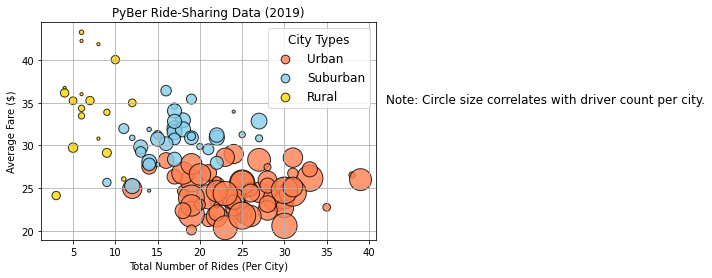

In [16]:
## now that we've gathered all the necessary variables for our graphs, let's create them. If we need to visualize each
## scatterplot separately, we can use separate cells and do them one at a time. In the same cell, however, they will stack

# build the scatterplot for urban cities
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

# build the scatterplot for suburban cities
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

# build the scatterplot for rural cities
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

## notice there's an issue with the markers in our legend, though. This is because the marker in legend is sized according
## to the average marker size for that city type. We can format this by adding a constructor

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

In [17]:
plt.savefig("analysis/Fig1.png")
# this will save the png to the folder "analysis" in the jupyter folder. Make sure there is a folder named "analysis"

<Figure size 432x288 with 0 Axes>